# follow-trend

    1. S&P 500 index closes above its 200 day moving average
    2. The stock closes above its upper band, buy
    
    1. S&P 500 index closes below its 200 day moving average
    2. The stock closes below its lower band, sell your long position.
    
    (multiple securities)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define symbols

In [4]:
# S&P All Sectors
symbols = ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
# Other Sectors
#symbols = ['RSP', 'DIA', 'IWM', 'QQQ', 'DAX', 'EEM', 'TLT', 'GLD', 'XHB']

# Elite Stocks
#symbols = ['ADP', 'BMY', 'BRK-B', 'BTI', 'BUD', 'CL', 'CLX', 'CMCSA', 'DIS', 'DOV']
#symbols += ['GIS', 'HD', 'HRL', 'HSY', 'INTC', 'JNJ', 'K', 'KMB', 'KMI', 'KO']
#symbols += ['LLY', 'LMT', 'MCD', 'MO', 'MRK', 'MSFT', 'NUE', 'PG', 'PM', 'RDS-B']
#symbols += ['SO', 'T', 'UL', 'V', 'VZ', 'XOM']

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for symbol in symbols:
    print("{0}".format(symbol), end=" ")
    strategies[symbol] = strategy.Strategy(symbol, capital, start, end, use_adj=True,
                                           sma_period=200, percent_band=3.5, regime_filter=True)
    strategies[symbol].run()
    _, strategies[symbol].tlog, strategies[symbol].dbal = strategies[symbol].get_logs()
    strategies[symbol].stats = strategies[symbol].get_stats()

SPY XLB XLE XLF XLI XLK XLP XLU XLV XLY 

Summarize results

In [6]:
metrics = ('start',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'annual_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
pd.set_option('display.max_columns', len(df.columns))
df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
start,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03
annual_return_rate,3.75,2.22,6.04,5.56,4.19,4.29,3.16,4.72,2.35,4.89
max_closed_out_drawdown,-28.19,-34.08,-21.30,-28.57,-24.63,-47.00,-19.84,-17.23,-32.08,-28.10
sharpe_ratio,0.41,0.23,0.49,0.44,0.41,0.38,0.43,0.51,0.28,0.48
sortino_ratio,0.40,0.24,0.50,0.50,0.42,0.38,0.45,0.53,0.28,0.48
monthly_std,2.74,3.58,3.86,3.88,3.29,3.72,2.02,2.76,2.82,3.13
annual_std,9.31,12.19,14.01,15.92,11.52,13.34,7.78,8.25,11.78,12.23
pct_time_in_market,63.13,57.29,51.30,57.81,61.16,63.50,59.09,58.66,57.58,59.34
total_num_trades,31,37,49,33,43,49,52,53,44,41
pct_profitable_trades,41.94,27.03,53.06,39.39,27.91,38.78,42.31,54.72,31.82,31.71


In [7]:
# averages
avg_annual_return_rate = df.loc['annual_return_rate'].mean()
avg_sharpe_ratio = df.loc['sharpe_ratio'].mean()
print('avg_annual_return_rate: {}'.format(avg_annual_return_rate))
print('avg_sharpe_ratio:       {}'.format(avg_sharpe_ratio))

avg_annual_return_rate: 4.115601229005767
avg_sharpe_ratio:       0.4050789704307059


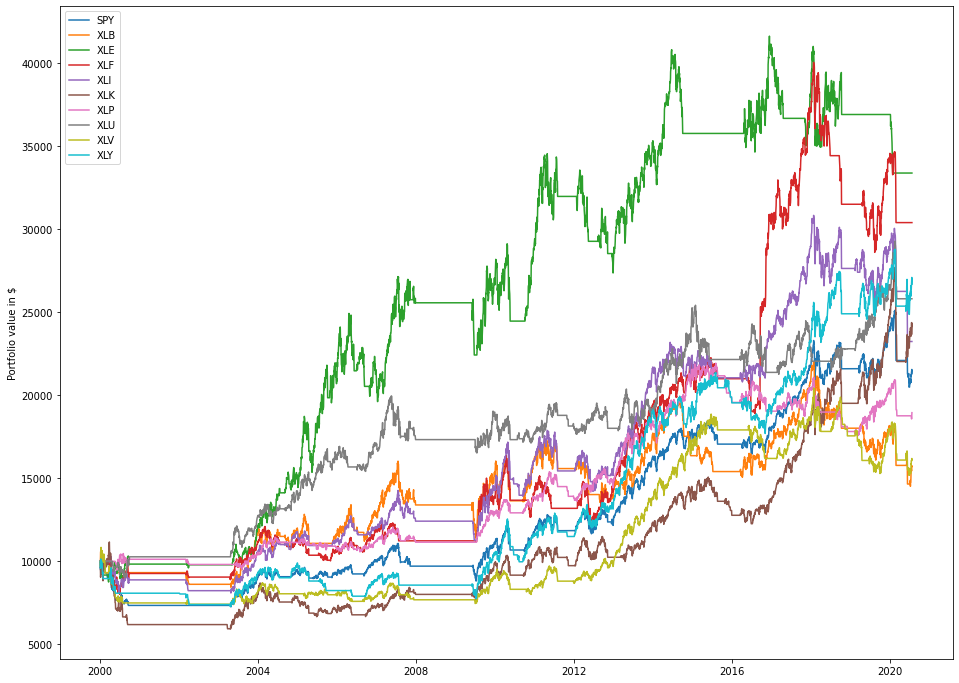

In [8]:
pf.plot_equity_curves(strategies)